## 案例背景：
研究公司董事会成员的学历、性别、年龄、技术背景、海外留学背景、持股比例等因素对公司业绩影响，如ROE的影响
## 案例目的：
1.从董事会角度探寻影响公司ROE收益率的因素
2.构建随机森林模型预测模型以预测来年ROE发展情况

## 数据介绍：
2019.1.1-2019.12.31日的1000多家企业公司法人信息及公司对应ROE明细：
    
    1)自变量：性别、最高学历、董事地位、在职年份、任职年份数、是否独立董事、高级管理人员类型、是否存在高级管理人员兼任情况、是否领取薪酬、报告期报酬总额、其中：津贴、年末持股数、持有上市公司股份比例(%)、职业背景、海外背景、学术背景、金融背景
    
    2)因变量：2019年公司ROE（净资产收益率）

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f=open("C:/Users/1/Desktop/caiwu/ROE3.csv",encoding='gbk',errors='ignore')#部分文件有字节编码错误，errors 忽略
ROE=pd.read_csv(f)
f.close

<function TextIOWrapper.close()>

In [3]:
f1=open("C:/Users/1/Desktop/caiwu/shuxing2.csv",encoding='gbk',errors='ignore')#部分文件有字节编码错误，errors 忽略
caiwu=pd.read_csv(f1)
f1.close

<function TextIOWrapper.close()>

In [4]:
caiwu.head()

,Symbol,ShortName,PersonID,Gender,Degree_H,ProfessionalTitle,total_Position,Gender1,Degree_H1,Position_num,...,IsIndependentDirector,ExecutiveType,IsConcurrentPosition,IsReceivingCompensation,TotalSalary,EndDateHoldShares,ShareholdingRatio,CareerBack,OverseasBack,AcademicBack
0,2099,海翔药业,3089932,男,博士研究生,"教授,讲师,助教",独立董事,1.0,7,1,...,1,0,0,0.0,80000.0,0.0,0.0,1,3,1
1,2099,海翔药业,3043244,女,本科,高级会计师,独立董事,0.0,4,1,...,1,0,0,0.0,80000.0,0.0,0.0,2,3,4
2,2099,海翔药业,30298774,男,博士研究生,"研究员,教授",独立董事,1.0,7,1,...,1,0,0,0.0,20000.0,0.0,0.0,1,3,2
3,2099,海翔药业,30197722,男,博士研究生,研究员,监事,1.0,7,1,...,0,0,0,1.0,265400.0,0.0,0.0,1,3,4
4,2099,海翔药业,30357220,男,本科,"审计员,会计师",副总经理,1.0,4,2,...,0,1,0,1.0,600800.0,0.0,0.0,2,3,4


In [5]:
ROE.head()

,Symbol,ROE
0,796,0.061190
1,2099,0.138692
2,2315,0.077216
3,1,0.101966
4,600315,0.092090


In [6]:
data=pd.merge(left=caiwu,right=ROE,how='inner',on='Symbol')
data.head()

,Symbol,ShortName,PersonID,Gender,Degree_H,ProfessionalTitle,total_Position,Gender1,Degree_H1,Position_num,...,ExecutiveType,IsConcurrentPosition,IsReceivingCompensation,TotalSalary,EndDateHoldShares,ShareholdingRatio,CareerBack,OverseasBack,AcademicBack,ROE
0,2099,海翔药业,3089932,男,博士研究生,"教授,讲师,助教",独立董事,1.0,7,1,...,0,0,0.0,80000.0,0.0,0.0,1,3,1,0.138692
1,2099,海翔药业,3043244,女,本科,高级会计师,独立董事,0.0,4,1,...,0,0,0.0,80000.0,0.0,0.0,2,3,4,0.138692
2,2099,海翔药业,30298774,男,博士研究生,"研究员,教授",独立董事,1.0,7,1,...,0,0,0.0,20000.0,0.0,0.0,1,3,2,0.138692
3,2099,海翔药业,30197722,男,博士研究生,研究员,监事,1.0,7,1,...,0,0,1.0,265400.0,0.0,0.0,1,3,4,0.138692
4,2099,海翔药业,30357220,男,本科,"审计员,会计师",副总经理,1.0,4,2,...,1,0,1.0,600800.0,0.0,0.0,2,3,4,0.138692


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11059 entries, 0 to 11058
Data columns (total 22 columns):
Symbol                     11059 non-null int64
ShortName                  11059 non-null object
PersonID                   11059 non-null int64
Gender                     11057 non-null object
Degree_H                   11059 non-null object
ProfessionalTitle          11059 non-null object
total_Position             11059 non-null object
Gender1                    11057 non-null float64
Degree_H1                  11059 non-null int64
Position_num               11059 non-null int64
workyear                   11059 non-null int64
IsIndependentDirector      11059 non-null int64
ExecutiveType              11059 non-null int64
IsConcurrentPosition       11059 non-null int64
IsReceivingCompensation    10848 non-null float64
TotalSalary                10874 non-null float64
EndDateHoldShares          11059 non-null float64
ShareholdingRatio          11059 non-null float64
CareerBack  

In [8]:
#删除空格行
data=data.dropna(axis=0, how='any')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 11058
Data columns (total 22 columns):
Symbol                     10812 non-null int64
ShortName                  10812 non-null object
PersonID                   10812 non-null int64
Gender                     10812 non-null object
Degree_H                   10812 non-null object
ProfessionalTitle          10812 non-null object
total_Position             10812 non-null object
Gender1                    10812 non-null float64
Degree_H1                  10812 non-null int64
Position_num               10812 non-null int64
workyear                   10812 non-null int64
IsIndependentDirector      10812 non-null int64
ExecutiveType              10812 non-null int64
IsConcurrentPosition       10812 non-null int64
IsReceivingCompensation    10812 non-null float64
TotalSalary                10812 non-null float64
EndDateHoldShares          10812 non-null float64
ShareholdingRatio          10812 non-null float64
CareerBack  

In [10]:
data.head()

,Symbol,ShortName,PersonID,Gender,Degree_H,ProfessionalTitle,total_Position,Gender1,Degree_H1,Position_num,...,ExecutiveType,IsConcurrentPosition,IsReceivingCompensation,TotalSalary,EndDateHoldShares,ShareholdingRatio,CareerBack,OverseasBack,AcademicBack,ROE
0,2099,海翔药业,3089932,男,博士研究生,"教授,讲师,助教",独立董事,1.0,7,1,...,0,0,0.0,80000.0,0.0,0.0,1,3,1,0.138692
1,2099,海翔药业,3043244,女,本科,高级会计师,独立董事,0.0,4,1,...,0,0,0.0,80000.0,0.0,0.0,2,3,4,0.138692
2,2099,海翔药业,30298774,男,博士研究生,"研究员,教授",独立董事,1.0,7,1,...,0,0,0.0,20000.0,0.0,0.0,1,3,2,0.138692
3,2099,海翔药业,30197722,男,博士研究生,研究员,监事,1.0,7,1,...,0,0,1.0,265400.0,0.0,0.0,1,3,4,0.138692
4,2099,海翔药业,30357220,男,本科,"审计员,会计师",副总经理,1.0,4,2,...,1,0,1.0,600800.0,0.0,0.0,2,3,4,0.138692


上市董事会成员构成情况——董事会成员男女比例为8：2；其中最高学历多为本科和研究生；职称多为高级经济师、高级工程师，高级会计师等等
；职级主要为独立董事、董事以及副总经理;

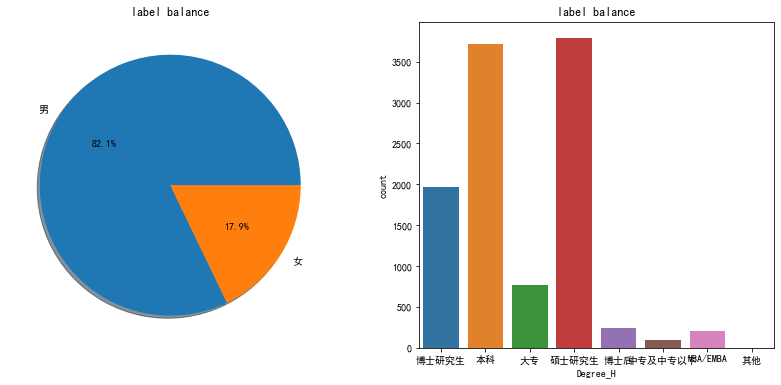

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
f,ax=plt.subplots(1,2,figsize=(14,6))
caiwu['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label balance')
ax[0].set_ylabel('')
sns.countplot('Degree_H',data=data,ax=ax[1]) 
ax[1].set_title('label balance')      
plt.show()

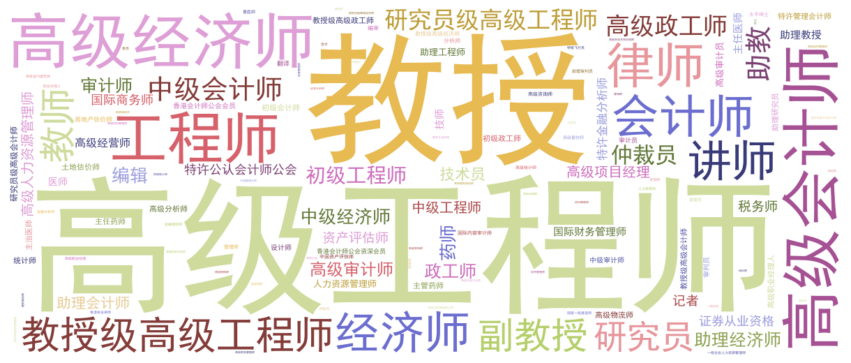

In [12]:
from collections import Counter
data111=data["ProfessionalTitle"].dropna().astype(str)
title_words = list(data111.apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

import wordcloud
import matplotlib.pyplot as plt
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(font_path='./fonts/simhei.ttf',width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

###备注，中文识别 记得添加font_path那句话即可

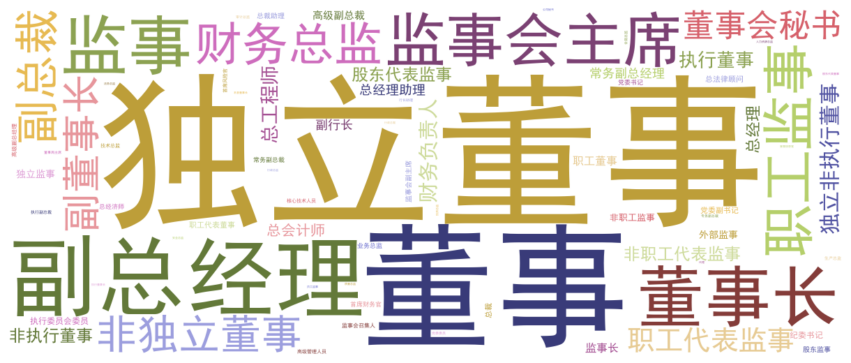

In [13]:
from collections import Counter
data11=data["total_Position"].dropna().astype(str)
title_words1 = list(data11.apply(lambda x: x.split()))
title_words1 = [x for y in title_words1 for x in y]
Counter(title_words1).most_common(25)

import wordcloud
import matplotlib.pyplot as plt
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(font_path='./fonts/simhei.ttf',width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words1))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

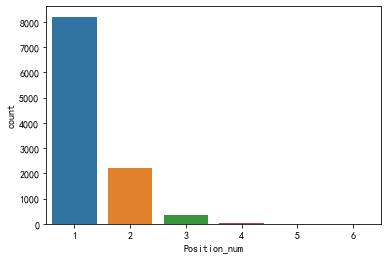

In [14]:
sns.countplot('Position_num',data=data) 

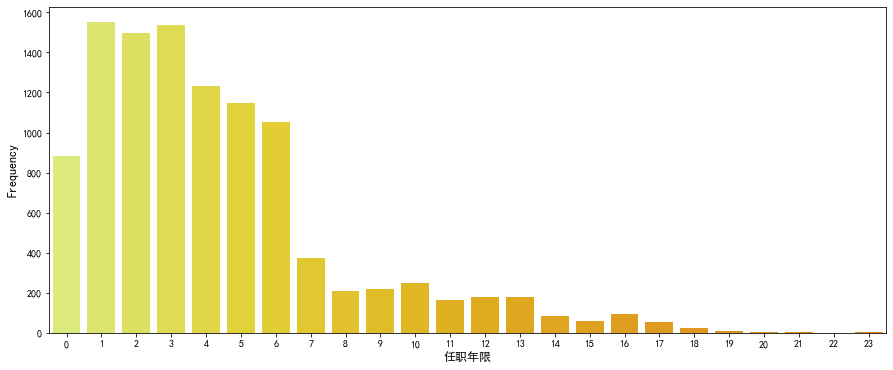

In [15]:
data['workyear']=data['workyear'].astype(int)
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data['workyear'], ax=ax, palette ="Wistia")
#ax.set_title('董事会任职年限分布', fontsize=16)
ax.set_xlabel('任职年限', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [16]:
data_roe=data.groupby('Symbol')['ROE'].mean().reset_index()
data_roe

,Symbol,ROE
0,1,0.101966
1,2,0.217825
2,4,-0.004540
3,6,0.124379
4,8,0.061065
...,...,...
1503,688018,0.165018
1504,900939,0.094946
1505,900948,0.110028
1506,900953,0.064669


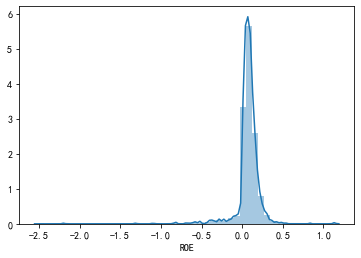

In [17]:
sns.distplot(data_roe['ROE'])

# 实证分析


In [18]:
data1=data.drop(['Symbol','ShortName','PersonID','Gender','Degree_H','ProfessionalTitle','total_Position'],axis=1)

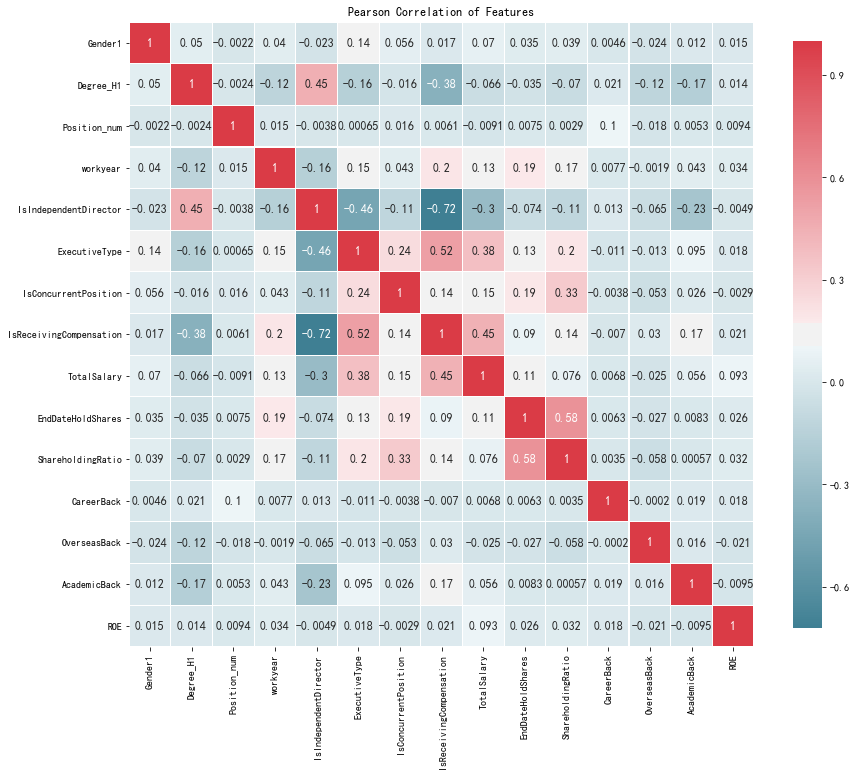

In [19]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=12)

correlation_heatmap(data1)

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res = smf.ols(formula='ROE ~ C(Gender1)+Degree_H1+Position_num+workyear+C(IsIndependentDirector)+ExecutiveType+C(IsConcurrentPosition)+C(IsReceivingCompensation)+TotalSalary+EndDateHoldShares+ShareholdingRatio+C(CareerBack)+C(AcademicBack)+C(OverseasBack)', data=data1).fit()

In [21]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROE   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.905
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.57e-18
Time:                        18:27:41   Log-Likelihood:                 5086.6
No. Observations:               10812   AIC:                        -1.012e+04
Df Residuals:                   10787   BIC:                            -9941.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.0546      0.014      3.779      0.000       0.026       0.083
C(Gender1)[T.1.0]                     0.0034      0.004      0.875      0.382      -0.004       0.011
C(IsIndependentDirector)[T.1]         0.0015      0.006      0.264      0.792      -0.009       0.012
C(IsConcurrentPosition)[T.1]         -0.0218      0.009     -2.399      0.016      -0.040      -0.004
C(IsReceivingCompensation)[T.1.0]    -0.0032      0.005     -0.678      0.498      -0.013       0.006
C(CareerBack)[T.2]                    0.0013      0.003      0.393      0.694      -0.005       0.008
C(CareerBack)[T.3]                    0.0064      0.004      1.551      0.121      -0.002       0.014
C(CareerBack)[T.4]                    0.0039      0.007      0.535      0.593      -0.010       0.018
C(CareerBack)[T.5]                    0.0223      0.021      1.082      0.279      -0.018       0.063
C(CareerBack)[T.6]                    0.0324      0.087      0.370      0.711      -0.139       0.204
C(AcademicBack)[T.2]                 -0.0034      0.011     -0.322      0.747      -0.024       0.017
C(AcademicBack)[T.3]                  0.0013      0.008      0.166      0.868      -0.014       0.016
C(AcademicBack)[T.4]                 -0.0047      0.006     -0.813      0.416      -0.016       0.007
C(AcademicBack)[T.5]                  0.0034      0.007      0.515      0.607      -0.010       0.017
C(AcademicBack)[T.6]                 -0.0216      0.012     -1.854      0.064      -0.044       0.001
C(OverseasBack)[T.2]                 -0.0017      0.011     -0.150      0.881      -0.024       0.021
C(OverseasBack)[T.3]                 -0.0060      0.008     -0.732      0.464      -0.022       0.010
C(OverseasBack)[T.4]                 -0.0325      0.015     -2.145      0.032      -0.062      -0.003
Degree_H1                             0.0014      0.001      1.011      0.312      -0.001       0.004
Position_num                          0.0026      0.003      0.953      0.340      -0.003       0.008
workyear                              0.0009      0.000      2.170      0.030    8.77e-05       0.002
ExecutiveType                        -0.0048      0.004     -1.253      0.210      -0.012       0.003
TotalSalary                        1.863e-08   1.97e-09      9.435      0.000    1.48e-08    2.25e-08
EndDateHoldShares                 -9.967e-12   4.33e-11     -0.230      0.818   -9.49e-11     7.5e-11
ShareholdingRatio                     0.0013      0.000      2.820      0.005       0.000       0.002
==============================================================================
Omnibus:                    11517.976   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          23

In [29]:
with open('summary1.csv', 'w') as fh:
    fh.write(res.summary().as_csv())

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res = smf.ols(formula='ROE ~ C(Gender1)+Degree_H1+Position_num+workyear+ExecutiveType+C(IsConcurrentPosition)+C(IsReceivingCompensation)+TotalSalary+ShareholdingRatio', data=data1).fit()

In [23]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     14.02
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           9.84e-23
Time:                        18:27:49   Log-Likelihood:                 5078.9
No. Observations:               10812   AIC:                        -1.014e+04
Df Residuals:                   10802   BIC:                        -1.006e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.0462      0.008      5.486      0.000       0.030       0.063
C(Gender1)[T.1.0]                     0.0033      0.004      0.861      0.389      -0.004       0.011
C(IsConcurrentPosition)[T.1]         -0.0216      0.009     -2.386      0.017      -0.039      -0.004
C(IsReceivingCompensation)[T.1.0]    -0.0053      0.004     -1.344      0.179      -0.013       0.002
Degree_H1                             0.0018      0.001      1.529      0.126      -0.001       0.004
Position_num                          0.0029      0.003      1.097      0.273      -0.002       0.008
workyear                              0.0009      0.000      2.222      0.026       0.000       0.002
ExecutiveType                        -0.0051      0.004     -1.359      0.174      -0.013       0.002
TotalSalary                        1.882e-08   1.96e-09      9.581      0.000     1.5e-08    2.27e-08
ShareholdingRatio                     0.0013      0.000      3.390      0.001       0.001       0.002
==============================================================================
Omnibus:                    11554.654   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2350204.799
Skew:                          -5.014   Prob(JB):                         0.00
Kurtosis:                      74.528   Cond. No.                     6.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
with open('summary2.csv', 'w') as fh:
    fh.write(res.summary().as_csv())

In [24]:
res.mse_total

0.02315242065658833

In [147]:
data1['pred'] = res.predict()

In [148]:
data1.head()

,Gender1,Degree_H1,Position_num,workyear,IsIndependentDirector,ExecutiveType,IsConcurrentPosition,IsReceivingCompensation,TotalSalary,EndDateHoldShares,ShareholdingRatio,CareerBack,OverseasBack,AcademicBack,ROE,pred
0,1.0,7,1,4,1,0,0,0.0,80000.0,0.0,0.0,1,3,1,0.138692,0.070700
1,0.0,4,1,4,1,0,0,0.0,80000.0,0.0,0.0,2,3,4,0.138692,0.062547
2,1.0,7,1,1,1,0,0,0.0,20000.0,0.0,0.0,1,3,2,0.138692,0.065588
3,1.0,7,1,8,0,0,0,1.0,265400.0,0.0,0.0,1,3,4,0.138692,0.068012
4,1.0,4,2,4,0,1,0,1.0,600800.0,0.0,0.0,2,3,4,0.138692,0.067071


In [34]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [35]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from C:\Users\1\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\1\AppData\Local\Temp\tmpxapbdxwc
  JVM stdout: C:\Users\1\AppData\Local\Temp\tmpxapbdxwc\h2o_1_started_from_python.out
  JVM stderr: C:\Users\1\AppData\Local\Temp\tmpxapbdxwc\h2o_1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Shanghai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_1_1hbcdh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,891 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [39]:
h2o_df = H2OFrame(data)

h2o_df['Gender1'] = h2o_df['Gender1'].asfactor()
h2o_df['CareerBack'] = h2o_df['CareerBack'].asfactor()

h2o_df['AcademicBack'] = h2o_df['AcademicBack'].asfactor()
h2o_df['OverseasBack'] = h2o_df['OverseasBack'].asfactor()


h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,Symbol,ShortName,PersonID,Gender,Degree_H,ProfessionalTitle,total_Position,Gender1,Degree_H1,Position_num,workyear,IsIndependentDirector,ExecutiveType,IsConcurrentPosition,IsReceivingCompensation,TotalSalary,EndDateHoldShares,ShareholdingRatio,CareerBack,OverseasBack,AcademicBack,ROE
type,int,enum,int,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,int,real,real,enum,enum,enum,real
mins,1.0,,3096.0,,,,,,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,-2.504995
mean,282583.6754532016,,24641970.23834634,,,,,,4.929245283018859,1.283758786533485,4.296707362190159,0.27839437661857197,0.3504439511653718,0.031169071402145764,0.5747317795042546,500581.64150943485,5014345.403605241,0.7257509433962254,,,,0.07064628311135752
maxs,900956.0,,30562627.0,,,,,,8.0,6.0,23.0,1.0,1.0,1.0,1.0,29257300.0,1951811430.0,64.6228,,,,1.140584
sigma,269327.0240659701,,11107477.457335688,,,,,,1.3159921778718564,0.546719181286936,3.628887515880477,0.44822932721231334,0.47713105530861605,0.17378248938120416,0.49440648169182816,852623.8171595831,41891963.64112374,4.102578363717066,,,,0.15215919511021467
zeros,0,,0,,,,,,1,0,883,7802,7023,10475,4598,1698,7742,7785,,,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2099.0,<0xBAA3CFE8D2A9D2B5>,3089932.0,<0xC4D0>,<0xB2A9CABFD1D0BEBFC9FA>,"<0xBDCCCADA>,<0xBDB2CAA6>,<0xD6FABDCC>",<0xB6C0C1A2B6ADCAC2>,1,7.0,1.0,4.0,1.0,0.0,0.0,0.0,80000.0,0.0,0.0,1,3,1,0.138692
1,2099.0,<0xBAA3CFE8D2A9D2B5>,3043244.0,女,<0xB1BEBFC6>,<0xB8DFBCB6BBE1BCC6CAA6>,<0xB6C0C1A2B6ADCAC2>,0,4.0,1.0,4.0,1.0,0.0,0.0,0.0,80000.0,0.0,0.0,2,3,4,0.138692
2,2099.0,<0xBAA3CFE8D2A9D2B5>,30298774.0,<0xC4D0>,<0xB2A9CABFD1D0BEBFC9FA>,"<0xD1D0BEBFD4B1>,<0xBDCCCADA>",<0xB6C0C1A2B6ADCAC2>,1,7.0,1.0,1.0,1.0,0.0,0.0,0.0,20000.0,0.0,0.0,1,3,2,0.138692


In [40]:
# Split into 67% training and 33% test dataset
strat_split = h2o_df['ROE'].stratified_split(test_frac=0.30, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = [ 'Gender1', 'Degree_H1','Position_num','workyear','IsIndependentDirector','ExecutiveType'
           ,'IsConcurrentPosition','IsReceivingCompensation','TotalSalary','EndDateHoldShares','ShareholdingRatio'
           ,'CareerBack','AcademicBack', 'OverseasBack']
target = 'ROE'

In [41]:
train, valid, test = h2o_df.split_frame(ratios=[0.7, 0.15], seed=42)
# Prepare the hyperparameters
nfolds = 5
rf_params = {
                'max_depth': [3, 4,5],
                'sample_rate': [0.8, 1.0],               # Row sample rate
                'mtries' : [2,4,3]
                }



# Search criteria for parameter space
search_criteria = {'strategy': "RandomDiscrete",
                   "seed": 1,
                   'stopping_metric': "AUTO",
                   'stopping_tolerance': 0.0005
                   }



# Prepare the grid object
rf_grid = H2OGridSearch(model=H2ORandomForestEstimator,   # Model to be trained
                          grid_id='rf_grid',                  # Grid Search ID
                          hyper_params=rf_params,              # Dictionary of parameters
                          search_criteria=search_criteria,   # RandomDiscrete
                          )

In [42]:

# Train the Model

rf_grid.train(x=feature,y=target, 
                training_frame=train,
                validation_frame=valid,
                ntrees=100,      
                score_each_iteration=True,
                nfolds = nfolds,
                fold_assignment= "Modulo",
                seed=1
                )

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [43]:
# Find the Model performance 
rf_gridperf = rf_grid.get_grid(sort_by='RMSE',decreasing = False)
rf_gridperf


     max_depth mtries sample_rate         model_ids                 rmse
0            5      4         1.0   rf_grid_model_3  0.14972267693442423
1            4      4         1.0  rf_grid_model_10  0.14978831700776038
2            5      4         0.8   rf_grid_model_7  0.14980020246576978
3            4      4         0.8   rf_grid_model_4  0.14985502625668173
4            5      3         1.0   rf_grid_model_8  0.14986833659825619
5            5      3         0.8  rf_grid_model_17  0.14987176645367373
6            3      4         1.0  rf_grid_model_14  0.14993367633502958
7            4      3         1.0   rf_grid_model_6  0.14993764613871088
8            3      4         0.8   rf_grid_model_1  0.14996985025426612
9            4      3         0.8  rf_grid_model_13  0.14997165662880957
10           5      2         1.0   rf_grid_model_9  0.15002400599841295
11           5      2         0.8  rf_grid_model_18   0.1500640707924201
12           3      3         1.0  rf_grid_model_16

In [44]:
# Identify the best model generated with least error
best_rf_model = rf_gridperf.models[0]
best_rf_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid_model_3


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,45038.0,5.0,5.0,5.0,27.0,32.0,31.15




ModelMetricsRegression: drf
** Reported on train data. **

MSE: NaN
RMSE: NaN
MAE: NaN
RMSLE: NaN
Mean Residual Deviance: NaN

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.02171169790633619
RMSE: 0.14734889855827288
MAE: 0.0714467742214287
RMSLE: NaN
Mean Residual Deviance: 0.02171169790633619

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.022416879988409973
RMSE: 0.14972267693442423
MAE: 0.0708041622168884
RMSLE: NaN
Mean Residual Deviance: 0.022416879988409973

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07080395,0.0020606518,0.071493715,0.07173901,0.070850655,0.06730024,0.07263613
1,mean_residual_deviance,0.022416523,0.0032131465,0.022642795,0.024907105,0.02440313,0.016899737,0.023229847
2,mse,0.022416523,0.0032131465,0.022642795,0.024907105,0.02440313,0.016899737,0.023229847
3,r2,0.019273194,0.0041542086,0.025013816,0.016542947,0.014955882,0.022062967,0.017790357
4,residual_deviance,0.022416523,0.0032131465,0.022642795,0.024907105,0.02440313,0.016899737,0.023229847
5,rmse,0.1493845,0.011224674,0.15047523,0.15781985,0.15621501,0.12999898,0.15241341
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-05 17:00:06,16.980 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-05 17:00:06,16.993 sec,1.0,NaN,NaN,NaN,0.148124,0.072754,0.021941
2,,2020-10-05 17:00:06,17.006 sec,2.0,NaN,NaN,NaN,0.147649,0.071969,0.021800
3,,2020-10-05 17:00:06,17.015 sec,3.0,NaN,NaN,NaN,0.147519,0.071611,0.021762
4,,2020-10-05 17:00:06,17.025 sec,4.0,NaN,NaN,NaN,0.148007,0.071709,0.021906
5,,2020-10-05 17:00:06,17.035 sec,5.0,NaN,NaN,NaN,0.147840,0.071559,0.021857
6,,2020-10-05 17:00:06,17.047 sec,6.0,NaN,NaN,NaN,0.147753,0.071586,0.021831
7,,2020-10-05 17:00:06,17.059 sec,7.0,NaN,NaN,NaN,0.147636,0.071488,0.021796
8,,2020-10-05 17:00:06,17.071 sec,8.0,NaN,NaN,NaN,0.147635,0.071544,0.021796
9,,2020-10-05 17:00:06,17.085 sec,9.0,NaN,NaN,NaN,0.147546,0.071495,0.021770



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TotalSalary,273.879303,1.000000,0.420814
1,workyear,83.054222,0.303251,0.127612
2,ShareholdingRatio,65.210060,0.238098,0.100195
3,EndDateHoldShares,51.681950,0.188703,0.079409
4,Degree_H1,40.284649,0.147089,0.061897
5,AcademicBack,31.815281,0.116165,0.048884
6,CareerBack,24.299681,0.088724,0.037336
7,IsConcurrentPosition,23.904924,0.087283,0.036730
8,OverseasBack,15.870300,0.057946,0.024385
9,IsReceivingCompensation,10.741972,0.039222,0.016505


In [50]:
my_mojo = best_rf_model.download_mojo(path="C:/Users/1/Desktop/caiwu")

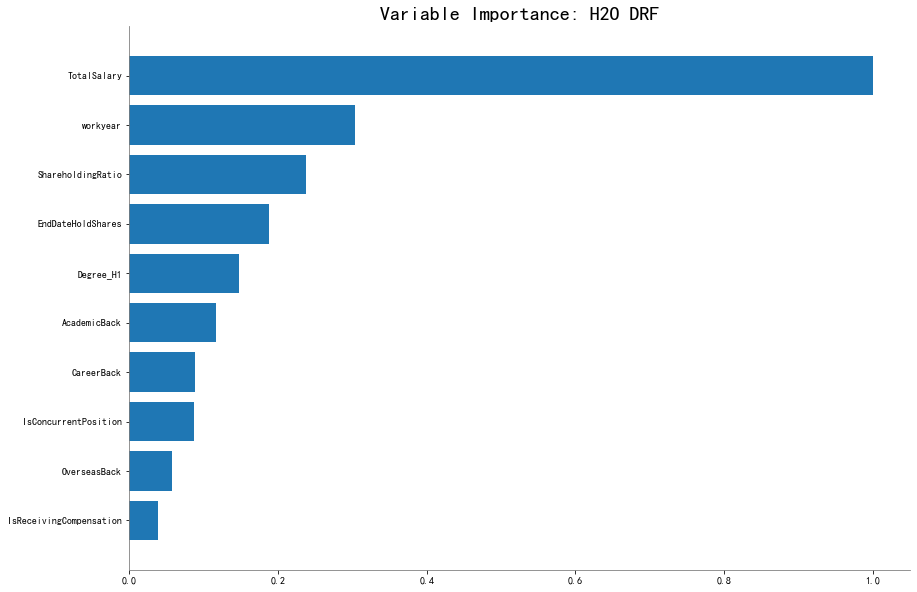

In [45]:
best_rf_model.varimp_plot()

In [46]:
pred = best_rf_model.predict(valid)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [47]:
pred

predict
0.0741875
0.0580996
0.101711
0.101678
0.0628534
0.118957
0.0403899
0.0677667
0.0608895
0.0708948


## 结论：
本次案例研究主要是以董事会内部结构为切入点，探寻影响公司ROE因素，为组织结构优化做战略参考。本文在进行数据清洗、预处理后，对当前董事会结构进行可视化分析，可知当前董事会成员男女性别比例存在失衡现象、高学历、领域专家成为董事会成员标配，同时“独立董事”一职在董事会成员职位中较为热门，且大部分董事会成员任职时间为2-4年。

其后的实证研究中，本文运用多元线性回归和随机森林两种方法对董事会治理结构与公司ROE之间关系进行建模分析，结果显示，薪资、上市公司股份比例等因素对公司ROE有重要影响，预测方面，二者模型评估方面差别不大，效果较好，MSE均为0.02左右。